In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [33]:
train = pd.read_csv('../data/train_processed.csv', header=0)
test = pd.read_csv('../data/test_processed.csv', header=0)

In [3]:
sampling = pd.read_csv('../data/samplingResults.csv', header=0)
ensemble = pd.read_csv('../data/metricsEnsembleTabNet.csv', header=0)
pca = pd.read_csv('../data/pcaResults.csv', header=0).drop('Unnamed: 0', axis=1)

In [5]:
print(train.shape, test.shape)

(136429, 264) (90954, 263)


In [6]:
metrics_df = sampling.append(ensemble).drop(8)

In [7]:
metrics_df = metrics_df.append(pca).reindex()
metrics_df.reset_index(drop=True, inplace=True)
metrics_df

,Sampling Technique,Precision,Recall,F1 Score,Accuracy,Confusion Matrix
0,Smote-RFC,0.994581,0.994796,0.994634,0.994796,[[26803 45]\n [ 97 341]]
1,Undersampled-RFC,0.986038,0.956534,0.968097,0.956534,[[25714 1134]\n [ 52 386]]
2,Resampled-RFC,0.994689,0.994906,0.994731,0.994906,[[26807 41]\n [ 98 340]]
3,Smote-GBT,0.994060,0.994283,0.994134,0.994283,[[26792 56]\n [ 100 338]]
4,Undersampled-GBT,0.985960,0.963608,0.972311,0.963608,[[25923 925]\n [ 68 370]]
5,Resampled-GBT,0.994060,0.994283,0.994134,0.994283,[[26792 56]\n [ 100 338]]
6,Undersampled-LGBM,0.994060,0.994283,0.994134,0.994283,[[26792 56]\n [ 100 338]]
7,Smote-LGBM,0.994340,0.994539,0.994407,0.994539,[[26794 54]\n [ 95 343]]
8,Resampled-LGBM,0.994244,0.994429,0.994312,0.994429,[[26790 58]\n [ 94 344]]
9,VotingClassifier,0.996271,0.996286,0.996058,0.996286,[[20138 2]\n [ 74 251]]


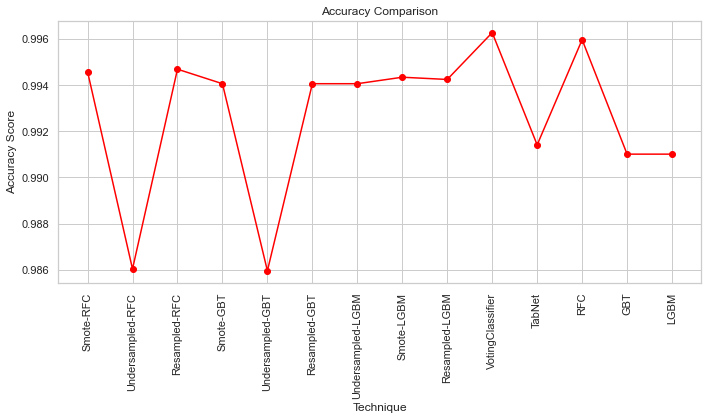

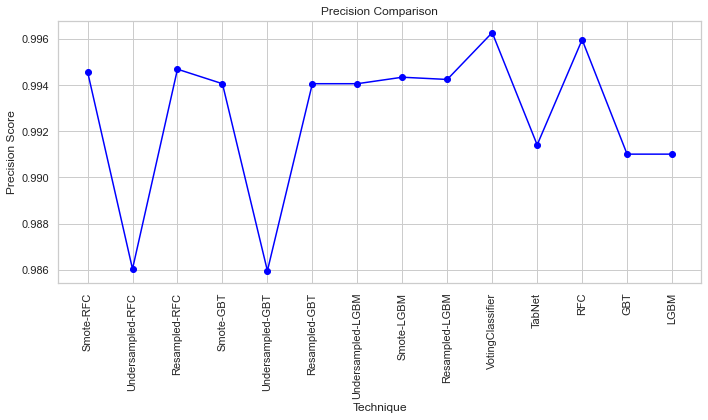

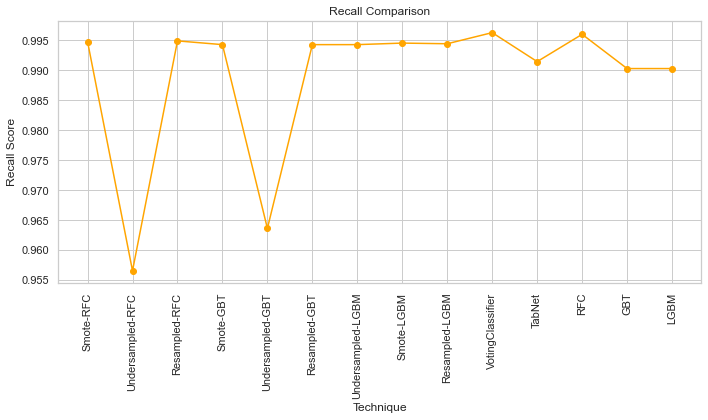

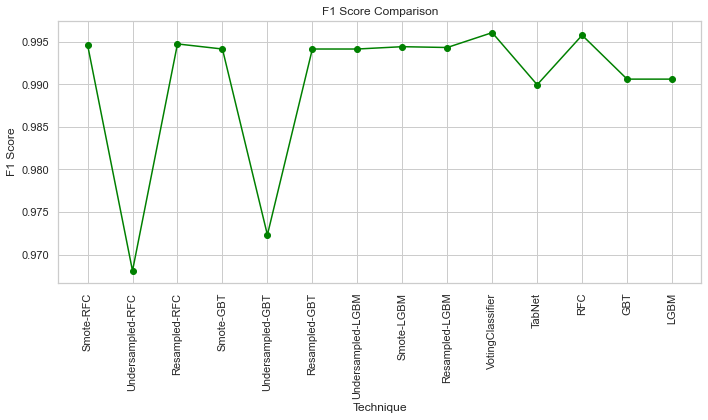

In [8]:
precision_values = metrics_df['Precision']
recall_values = metrics_df['Recall']
f1_values = metrics_df['F1 Score']
accuracy_values = metrics_df['Accuracy']

models = metrics_df['Sampling Technique']

sns.set(style="whitegrid")

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(models, precision_values, marker='o', linestyle='-', color='red')
plt.xlabel('Technique')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../figs/accuracy_comparison.png') 
plt.show()

# Plotting Precision
plt.figure(figsize=(10, 6))
plt.plot(models, precision_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Technique')
plt.ylabel('Precision Score')
plt.title('Precision Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../figs/precision_comparison.png')  
plt.show()

# Plotting Recall
plt.figure(figsize=(10, 6))
plt.plot(models, recall_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Technique')
plt.ylabel('Recall Score')
plt.title('Recall Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../figs/recall_comparison.png')  
plt.show()

# Plotting F1 Score
plt.figure(figsize=(10, 6))
plt.plot(models, f1_values, marker='o', linestyle='-', color='green')
plt.xlabel('Technique')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../figs/f1_comparison.png')  
plt.show()

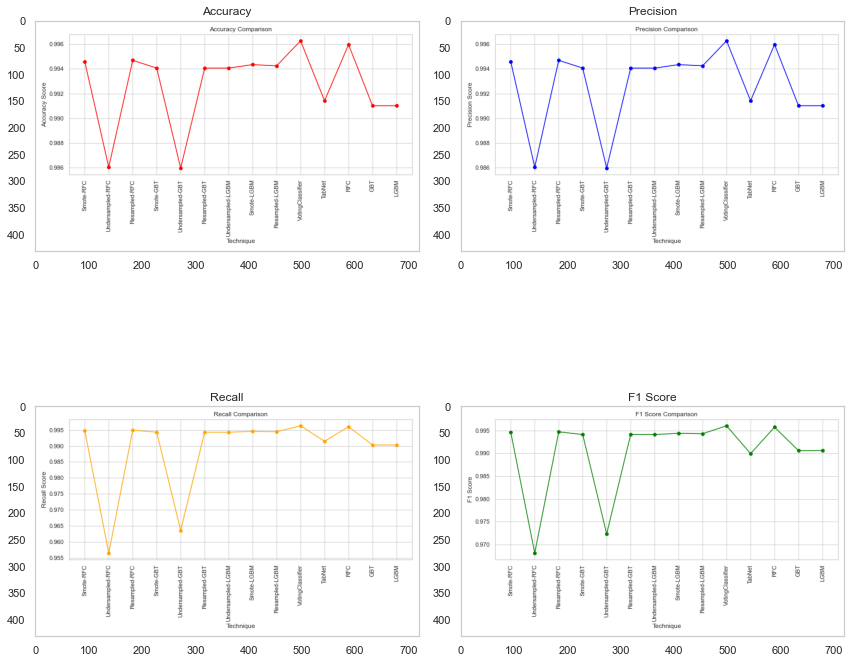

In [9]:
accuracy_img = mpimg.imread('../figs/accuracy_comparison.png')
precision_img = mpimg.imread('../figs/precision_comparison.png')
recall_img = mpimg.imread('../figs/recall_comparison.png')
f1_img = mpimg.imread('../figs/f1_comparison.png')

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# Show images on subplots
ax1.imshow(accuracy_img)
ax1.set_title('Accuracy')
ax1.grid(False)
ax2.imshow(precision_img)
ax2.set_title('Precision')
ax2.grid(False)
ax3.imshow(recall_img)
ax3.set_title('Recall')
ax3.grid(False)
ax4.imshow(f1_img)
ax4.set_title('F1 Score')
ax4.grid(False)

# Adjust layout
plt.tight_layout()
plt.savefig('../figs/scoreComparisons.png') 
plt.show()

In [34]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(train)

In [35]:
X_train = train.drop(['Machine failure'], axis=1)
y_train =train['Machine failure'].values
X_test = test

rf = RandomForestClassifier(n_estimators=51)
model = rf.fit(X_train, y_train)
feature_importance = model.feature_importances_
non_zero_indices = feature_importance != 0.0
feature_index = np.arange(len(feature_importance))[non_zero_indices]
importance = pd.DataFrame({'feature_index': feature_index, 'feature_importance': feature_importance[non_zero_indices]})

print('Train:', len(X_train))
print('Test:', len(X_test))
print(importance)

Train: 136429
Test: 90954
     feature_index  feature_importance
0                0        4.810914e-02
1                1        4.193739e-02
2                2        7.498332e-02
3                3        8.122334e-02
4                4        1.911241e-03
..             ...                 ...
256            258        2.515208e-04
257            259        1.421323e-08
258            260        4.963405e-04
259            261        1.720765e-04
260            262        1.129299e-04

[261 rows x 2 columns]


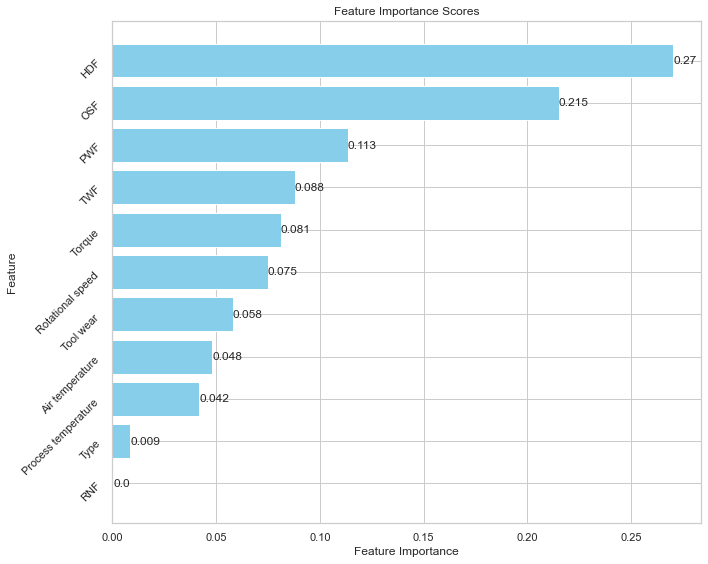

In [49]:
original_categorical_columns = ['Type', 'Air temperature ','Process temperature ',
                                'Rotational speed ', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
                                'Air temperature ', 'Process temperature ', 'Rotational speed ',
                                'Torque ', 'Tool wear ']
aggregated_categorical_importance = {}
for original_col in original_categorical_columns:
    related_features = [col for col in X_train.columns if col.startswith(original_col)]
    related_importance = importance[importance['feature_index'].isin([X_train.columns.get_loc(col) for col in related_features])]
    aggregated_importance = related_importance['feature_importance'].sum()
    aggregated_categorical_importance[original_col] = aggregated_importance
aggregated_categorical_importance = {k: v for k, v in sorted(aggregated_categorical_importance.items(), key=lambda item: item[1], reverse=True)}# Plot aggregated importance for categorical variables
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(aggregated_categorical_importance)), list(aggregated_categorical_importance.values()), color='skyblue')
plt.yticks(range(len(aggregated_categorical_importance)), list(aggregated_categorical_importance.keys()), rotation=45, ha='right')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis() 
for bar, value in zip(bars, aggregated_categorical_importance.values()):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(value, 3), ha='left', va='center')
plt.tight_layout() 
plt.savefig('../figs/categorical_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()